# Chapter 5: Kinetic modeling of a bioreactor


<img src="blackbox.jpg" width="470" />

Okay class, we are now shifting gears by getting inside of the black box models (mass balances) that we have considered before. We are now interested in understanding the rate or dynamic behavior of what is happening within the processes that we consider. Up until now, we have looked at how edible biomass is produced. We have seen from the work in chapters 1-4 that numerous waste streams are generated from the food chain, like non-edible biomass, livestock waste, manure and urine. We now fully understand that biomass contains energy and given the world's current energy crisis, we need to consider the potential for harvesting the energy from the unused biomass. This is where the [anaerobic digester](https://en.wikipedia.org/wiki/Anaerobic_digestion) plays a very important role. Numerous of the waste products from the food chain tend to end up in water and we also need some understanding of the biological treatment of these wastewaters.

But before we go into more detail, we must understand the basic governing formulas of the bioreactor. You might wonder what a bioreactor is. You have already encountered the bioreactor of the human body, a chicken, and an agricultural growth facility. A bioreactor can be seen as a defined space where organisms grow or where organisms maintain themself. To do this, energy is required, either in the form of sunlight if the organisms are [autotrophic](https://en.wikipedia.org/wiki/Autotroph) or in the form of chemical energy if the organisms are [heterotrophic](https://en.wikipedia.org/wiki/Heterotroph). So let's have a look at the basic governing equations of the bioreactor. 


### Basic equations of the bioreactor

Before you start, have a look at this video for some guidance:

[Video: Understanding Chapter 5](https://www.youtube.com/watch?v=rheCaQx2F7c)

In CBI310 we’ll assume that all fermenters are well mixed and that no concentration or temperature gradients exist within the fermentation broth. In real life, the assumption is often approximated where gradients are minimal. The easiest way to perform the mass balance over the fermenter is to consider the cmol balance of each component. To simplify only the liquid phase will be considered, we'll get to the other phases later.  We’ll start with a time-dependent model where the dynamic concentration and volume changes in the fermenter are incorporated by an accumulation term for each component ($\frac{dN_i}{dt}$). Note that the cmol quantity ($N_i$) is the product of the cmol concentration ($C_i$ in $\frac{cmol}{L}$) and the fermenter volume ($V$). The concentration of a component and/or volume will change with the addition/removal of the component as well as the formation/depletion of the component. The general cmol component balance is given by:

\begin{align*}
\frac{dN_i}{dt} &= Q^F C^F_i - QC_i + r_i C_X V \\
\left[\frac{cmol\,i}{h}\right] &= \left[ \frac{cmol\,i}{L} \cdot \frac{L}{h} \right] -\left[ \frac{cmol\,i}{L} \cdot \frac{L}{h} \right] + \left[ \frac{cmol\,i}{cmol\,X\cdot h} \cdot \frac{cmol\,X}{L} \cdot L \right]
\end{align*}

**Check and understand the units of all the terms. All 4 terms should have the same units!**

Note that the superscript $^F$ refers to a feed stream concentration ($C^F_i$) and the inlet volumetric flow rate ($Q^F$). Due to the perfect mixing the outlet concentration ($C_i$) will be the same as the concentration in the fermenter. We'll be using a constant inflow and outflow in numerous of our examples where the volume of the reactor stays constant so the above equation will reduce to:

\begin{align*}
V\frac{dC_i}{dt} &= Q(C^F_i - C_i) + r_i C_X V \\
\left[\frac{cmol\,i}{h}\right] &= \left[ \frac{cmol\,i}{L} \cdot \frac{L}{h} \right] -\left[ \frac{cmol\,i}{L} \cdot \frac{L}{h} \right] + \left[ \frac{cmol\,i}{cmol\,X\cdot h} \cdot \frac{cmol\,X}{L} \cdot L \right]
\end{align*}

We can further simplify the equation to:

\begin{align*}
\frac{dC_i}{dt} &= D(C^F_i - C_i) + r_i C_X \\
\end{align*}

where:
$$D=\frac{Q}{V}$$

Where D is referred to as the **Dilution rate** as it gives a measure of how fast liquid flows through the reactor. The higher the dilution rate the higher the flow or troughput through the reactor.

Apart from the cmol based rates ($r_i$) we'll define a volumetric rate ($r^V_i$) as follows:

\begin{align}
r^V_i &= r_i \cdot C_X \\
\left[ \frac{cmol\,i}{L \cdot h} \right] &= 
\left[ \frac{cmol\,i}{cmol\,X\cdot h} \cdot \frac{cmol\,X}{L} \right]
\end{align}

Also, note the relationship between cmol concentration ($C_i$) and the cmol amount ($N_i$). 

$$N_X=C_X\cdot V$$

### Growth ($\mu$) - the big driver

By now you understand that it is all about energy. In the next few chapters, we will see how micro-organisms (microbes) compete for energy. The first bit of energy obtained by microbes is always used for maintenance ($\theta$). The microbes need energy to repair old DNA, make new RNA, and build new proteins since old proteins do not last forever. If more energy is available than what is required for maintenance ($\theta$), the microbes will use the energy to procreate of **grow**. It is very important to understand the principles of growth **growth ($\mu$)!** Have a look at the test tubes below. The color in the tubes changes because more cells are present as time progresses. Growth can often be observed visually. The biomass content can be accurately determined via spectrophotometry:

<img src="growth.png" width="800" />

Let's have a look at the biochemical reaction that takes place in the test tubes:

<img src="bac1.png" width="600" />

You will see that glucose is the substrate, $NH_3$ the nitrogen source. Note that other life-bearing elements (**M**) like Ca, Mg, K, S, P will also be required for the microbe although not indicated. The metabolism entails the breakdown of glucose in an anaerobic environment to form propionic acid, acetic acid, and $CO_2$. In addition, biomass (**X**) will be formed because of growth. For this example we'll use the formula $CH_{1.8}O_{0.5}N_{0.2}$ for biomass.

Let's start by plotting the biomass ($X$) concentration against time:

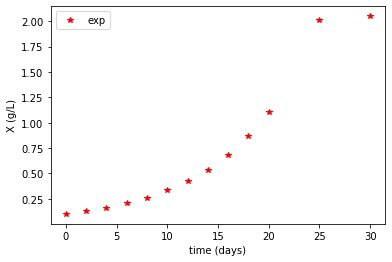

In [1]:
import numpy as np
import matplotlib.pyplot as plt

time=np.array([0,2,4,6,8,10,12,14,16,18,20,25,30])
x_exper=np.array([0.1,0.127,0.162,0.205, 0.261, 0.332, 0.422, 0.537, 0.682,0.867,1.102, 2.009, 2.05])

plt.figure(1)
plt.plot(time, x_exper,'*', color='red', label='exp')
plt.legend(loc='best')
plt.ylabel('X (g/L)') 
plt.xlabel('time (days)') 
plt.show()

Let's have a look at the cmol balance for biomass:

\begin{align*}
\frac{dC_i}{dt} &= D(C^F_i - C_i) + r_i C_X \\
\end{align*}

Given that this is a batch system, $D=0$ and thus:

\begin{align*}
\frac{dC_i}{dt} &= r_i C_X \\
\end{align*}

Accordingly, the equation becomes:

\begin{align*}
\frac{dC_X}{dt} &= r_X C_X \\
\end{align*}

**Important to note that $r_X$ is the rate of microbial biomass (X) formation. You will see below that $r_X$ is a rate that we calculate or specify in a matrix calculation exactly like we calculated in the previous chapters** Take for example the rate of manure production in humans in chapter 2. Here the units were $\frac{cmol\, manure}{Ben \cdot day}$. For calculations with biomass, we'll use $cmol\, X$ as the reference instead of the **Ben** basis. The rate of biomass formation will thus have units of $\frac{cmol\,X}{cmol\,X \cdot day}$

The rate of biomass formation ($r_X$) is often described by the Greek symbol $\mu$, accordingly:

\begin{align*}
\frac{dC_X}{dt} &= \mu C_X \\
\end{align*}

Let's have another look at the units of $\mu$

$$\mu \Rightarrow \frac{\text{cmol X}}{\text{cmol X} \cdot \text{day}} \Rightarrow \frac{1}{\text{day}}$$

Note that the basis is cmolX. 

For this example we know the maximum growth rate ($\mu_{max}$) to be 0.12 $\frac{1}{day}$ and the maintenance($\theta=0.3 \,\,\frac{mol\,ATP}{cmolX\cdot day}$).

Given this, we can integrate the above equation to see if the theory links up with the experimental results:

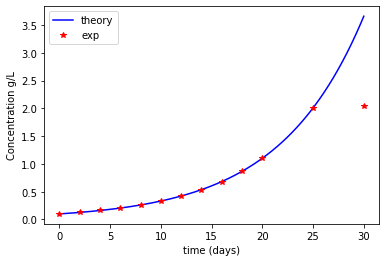

In [2]:
from scipy.integrate import odeint
mu=0.12

def response_fun(C,t):                       #function representing differential equation above
    Cx=C
    r=mu*Cx
    return r
    
MM_X=12+1.8+0.5*16+0.2*14

Co=[0.1/MM_X]                              #initial cmol value
tmax=30                                     # time to integrate to  
tspan=np.linspace(0,tmax,200)            # define the timespan of the integration and increments where values will be reported
Ci = odeint(response_fun, Co, tspan)             # integration via odeint that calls apon response_fun

Cx = Ci

plt.figure(2)
plt.plot(tspan, Cx*MM_X, color='blue', label='theory')
plt.plot(time, x_exper,'*', color='red', label='exp')
plt.legend(loc='best')
plt.ylabel('Concentration g/L') 
plt.xlabel('time (days)') 
plt.show()    

Wow, we see a perfect fit, but not the last experimental reading? Something makes the growth stops and it is the substrate running out. It makes sense that a microbe can't grow if there no food (or substrate) available. But how will we present this mathematically. We need a function that reduces $\mu$ as the substrate concentration becomes low. Also at zero substrate the $\mu$ value should be zero. To do this we use the **Monod equation** given by:

$$\mu=\mu_{max}(\frac{C_S}{K_S+C_S})$$

$\mu_{max}$ is the rate when substrate is in excess and $C_S$ the substrate concentration. Let's plot the function above to understand how it works. We'll use a Km value of 0.003$\frac{cmol}{L}$ as well as 0.03 $\frac{cmol}{L}$



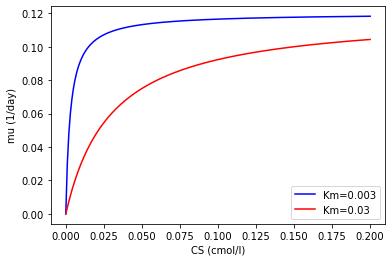

In [3]:
Km1,Km2=0.003, 0.03
mumax,thetamax=0.12, 0.3
Cs_span=np.linspace(0,0.2,200)
mu_span=mumax*Cs_span/(Cs_span+Km1)
mu_span2=mumax*Cs_span/(Cs_span+Km2)

plt.figure
plt.plot(Cs_span, mu_span, color='blue', label='Km=0.003')
plt.plot(Cs_span, mu_span2, color='red', label='Km=0.03')
plt.legend(loc='best')
plt.ylabel('mu (1/day)') 
plt.xlabel('CS (cmol/l)') 
plt.show() 

Note that the blue curve approaches the $\mu_{max}$ value of 0.12 $\frac{1}{day}$ at higher $C_S$. Important to note that the value of Km influences the curvature. For the Monod relationship we have:

$$\mu=\frac{1}{2} \mu_{max}\,\,\,\ if \,\,\,\ C_S=K_M$$

Can you see this off the graph?

In real life, $K_M$ values tend to be small and often the substrate concentration is high enough so that $\mu$ approximates $\mu_{max}$. One can use the heuristic that if $C_S>10K_M$ then $\mu \approx \mu_{max}$ 



To model the substrate (glucose in this example) we need to consider the overall reaction that includes all the reagents and products:

$$ CH_2O+ NH_3 → X+CH_2O+CH_2O_{2/3}+CO_2+H_2O $$

To do this we use the matrix method employed in the earlier chapters. Setting up matrices in Python is a hard job, it is much easier to define the matrix in Excel and then to quickly import into Python. The matrix (in Excel) will look like this:

<img src="mat2.png" width="750" />

You should be able to see that we have defined the $r_x=\mu$ at $\mu_{max}$ in the matrix above. Also, we have specified that:

$$r_C=0.5r_A$$

This specification is a direct result of the specific organism's metabolism. This is linked to the metabolism where a $C_3$ molecule splits to form acetate and $CO_2$.

The last specification is given by:

$$\frac{-2}{3}(r_S)-1.8r_X = \theta$$

In this specific example, it is known that each cmol of glucose consumed is associated with the formation of $\frac{2}{3}$ mol ATP. Similarly for each cmol of microbial biomass formed 1.8 mol of ATP is required (typically for protein and DNA synthesis and other stuff). Lastly, cells also require energy to sustain themselves without growing, this is referred to as **maintenance energy** or $\theta$. The units of $\theta$ is given by  $\frac{mol ATP}{cmolX \, day}$. The last specification thus states that energy generated by the breakdown of glucose is used for growth and maintenance. This is nothing more than the  **energy balance!!!** It is very similar to the energy balance for the calculation used on Ben, where 9000kJ/Ben/day was the maintenance energy for Ben's body. For microbes, the ATP balance becomes the energy balance.

<img src="energy1.png" width="550" />

Note that all 3 terms in the energy balance have units of  $\frac{mol ATP}{cmolX \, day}$ 





Let's now import the Excel matrix into Python. In order to import an Excel file the matrix need to look like this in the file:

<img src="mat3.png" width="550" />

Note that the first row won't be imported, although the first column will. The Pandas toolbox makes the import very easy:

In [4]:
import pandas
S1 = np.matrix(pandas.read_excel('matrix1.xlsx'))

theta,mu=0.3,0.12   #max rates specified
C= np.matrix([0, 0, 0,0,mu,0,theta]).T

### It is very important to understand that solving the matrix above is just solving the stoichiometry of the reaction given by:

$$ CH_2O+ NH_3 → X+CH_2O+CH_2O_{2/3}+CO_2+H_2O $$

### Rates in $\frac{cmol_i}{cmol\,X \cdot day}$ will be the answer to the matrix, please remember that stoichiometric  coefficients are merely the ratio of rates:

Remember this from chapter 2:

$$ A+\left(\frac{-r_B}{-r_A}\right)B \to \left(\frac{r_C}{-r_A}\right)C+\left(\frac{r_D}{-r_A}\right)D$$

So let's go on and solve for $r_S$,$r_N$,$r_X$,$r_A$,$r_P$,$r_C$ and $r_W$:


In [5]:
r = np.linalg.solve(S1, C) 
stoic=r/r[0,0]
stoic

matrix([[ 1.        ],
        [ 0.03100775],
        [-0.15503876],
        [-0.19810508],
        [-0.54780362],
        [-0.09905254],
        [-0.16106804]])

This implies that the stoicheometry is given by:

$$ CH_2O+ 0.031NH_3 → 0.155X+0.198CH_2O+0.548CH_2O_{2/3}+0.099CO_2+0.161H_2O $$


Let's play a bit with the matrix solution. What will happen if the growth is zero ($\mu=0$)?

In [6]:
C1= np.matrix([0, 0, 0,0,0,0,theta]).T
r1=np.linalg.solve(S1, C1) #new calculation
[r1, r]

[matrix([[-4.50000000e-01],
         [-1.16464572e-17],
         [ 3.34699588e-17],
         [ 1.00000000e-01],
         [ 3.00000000e-01],
         [ 5.00000000e-02],
         [ 5.00000000e-02]]),
 matrix([[-0.774     ],
         [-0.024     ],
         [ 0.12      ],
         [ 0.15333333],
         [ 0.424     ],
         [ 0.07666667],
         [ 0.12466667]])]

Above we compare the original rates to the $\mu=0$ rates. Interesting to see that we are still consuming substrate and forming products but not biomass. The stoicheometry can be determined to be:


In [7]:
stoich1=r1/r1[0,0]
stoich1

matrix([[ 1.00000000e+00],
        [ 2.58810160e-17],
        [-7.43776863e-17],
        [-2.22222222e-01],
        [-6.66666667e-01],
        [-1.11111111e-01],
        [-1.11111111e-01]])

Thus:

$$ CH_2O → 0.222CH_2O+0.667CH_2O_{2/3}+0.111CO_2+0.111H_2O $$

What will hapeen if we specify zero maintenance energy $\theta=0$:

In [8]:
C2= np.matrix([0, 0, 0,0,mu,0,0]).T
r2=np.linalg.solve(S1, C2) #new calculation
[r2, r]

[matrix([[-0.324     ],
         [-0.024     ],
         [ 0.12      ],
         [ 0.05333333],
         [ 0.124     ],
         [ 0.02666667],
         [ 0.07466667]]),
 matrix([[-0.774     ],
         [-0.024     ],
         [ 0.12      ],
         [ 0.15333333],
         [ 0.424     ],
         [ 0.07666667],
         [ 0.12466667]])]

In [9]:
stoich2=r2/r2[0,0]
stoich2

matrix([[ 1.        ],
        [ 0.07407407],
        [-0.37037037],
        [-0.16460905],
        [-0.38271605],
        [-0.08230453],
        [-0.23045267]])


Thus:

$$ CH_2O+ 0.074NH_3 → 0.37X+0.164CH_2O+0.382CH_2O_{2/3}+0.082CO_2+0.231H_2O $$

Can you see that the stoichiometry is different for r,r1 and r2? For maintenance zero biomass is formed and zero $NH_3$ is consumed. It is evident that the $\mu$ and $\theta$ specification changes the stoichiometry. It can be shown that r is just a linear combination of r1 and r2.

### Integrating differential equations


Before we model a batch fermenter where the above reaction takes place, we need some background on the numerical solution of differential equations. Please work through the following notebook and video:

[Intro to solving DE's](https://nbviewer.org/github/willienicol/CBI310-version2/blob/main/Chapter%205/Solving%20differential%20equations.ipynb)

Note that the notebook above is also available under the chapter 5 IPYN files:

[Lecture: Solving DE's in Python](https://youtu.be/Ouf9ZX5Xsg4)

Now that we understand something about numerical integration we can define the stoichiometric matrix within the rate function. Note that we include the MONOD term for when the substrate is low. To further understand the the differential equations that we will integrate we have to go back to the cmol balance discussed above. For a constant volume batch system it has been shown above that:

\begin{align*}
\frac{dC_i}{dt} &= r_i C_X \\
\end{align*}

Note that the function below returns the $r_iC_X$ and that an input $C$ of the component concentrations is required to calculate the rates. In this example, only $C_S$ is used for the MONOD term, but soon we will include other concentrations when determining $\mu$ and $\theta$.



In [10]:
mumax=0.12
thetamax=0.3
Ks=0.003

def response_fun2(t,C):
    
    Cs, Cx, Ca, Cp = C[0],C[1],C[2],C[3]   #Considered components
    
    mu=mumax*(Cs/(Ks+Cs))        #this terms reduces mu or theta as substrate becomes limited, more about this later
    theta=thetamax*(Cs/(Ks+Cs))

    C= np.matrix([0, 0, 0,0,mu,0,theta]).T
    r = np.linalg.solve(S1, C) 
    
        
    return [r[0,0]*Cx,   # glucose-substrate S
            r[2,0]*Cx,   # biomass X
            r[3,0]*Cx,   # acetic
            r[4,0]*Cx]   # propionic    

Note that we can now integrate for glucose, biomass, acetic acid and propionic acid. We have have excluded the other components just because we are only interested in plotting glucose, biomass, acetate and propionate. We will start with 0.537 cmol/L of glucose. Let's integrate:


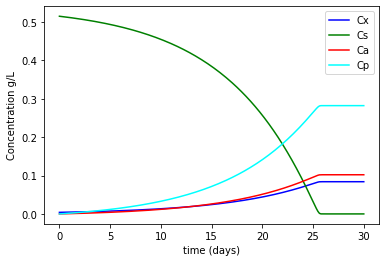

In [11]:
from scipy.integrate import solve_ivp

Co_2=[0.515,0.1/MM_X,0,0]             #initial cmol value of S,X,A,P
                      
tmax = 30                               # time to integrate to  
tspan=np.linspace(0,tmax,200)            # define the timespan of the integration and increments where values will be reported
tper = (0,tmax)                          #defining the starting and end time for the solve_IVP function

Ci2 = solve_ivp(response_fun2, tper, Co_2, dense_output = True, method = "LSODA")    # integration via odeint that calls apon response_fun

Cs, Cx, Ca, Cp = Ci2.sol(tspan)

plt.figure(3)
plt.plot(tspan, Cx, color='blue', label='Cx')
plt.plot(tspan, Cs, color='green', label='Cs')
plt.plot(tspan, Ca, color='red', label='Ca')
plt.plot(tspan, Cp, color='cyan', label='Cp')
plt.legend(loc='best')
plt.ylabel('Concentration g/L') 
plt.xlabel('time (days)') 
plt.show() 
   

How cool is this? We have solved 4 differential equations with just a few lines of code, and now we can see how all the concentrations vary with time in the batch reactor. Make sure you understand what the code is doing. 

Let's plot the experimental data and theoretical model for biomass:

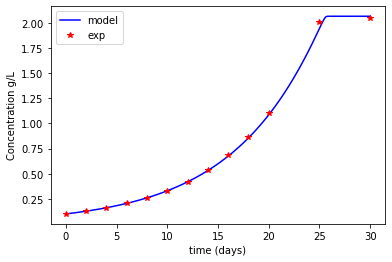

In [12]:
plt.figure(4)
plt.plot(tspan, Cx*MM_X, color='blue', label='model')
plt.plot(time, x_exper,'*', color='red', label='exp')
plt.legend(loc='best')
plt.ylabel('Concentration g/L') 
plt.xlabel('time (days)') 
plt.show() 

So now we have a full model of the process occuring with in the tubes shown above. Not only are we describing the biomass change, but also the change of substrate and metabolites in the mixture.

### Class exercise

We are going to model ethanol fermentation in this example. The overall equation is given by:

$$Glucose+NH_3 → X+ethanol+CO_2+H_2O $$

It is known that $\mu_{max}$ is 0.08 $\frac{1}{h}$ while the maintenance ($\theta_{max}$) is given by 4 $\frac{mmolATP}{g \cdot h}$.It is well established that $\frac{1}{3}$ mol of ATP is generated per cmol of glucose converted. Assume that biomass has a formula of $CH_{1.8}O_{0.5}N_{0.2}$ Set up your own matrix with energy balance included and integrate the batch fermentation if the initial glucose concentration is 50 $\frac{g}{L}$. Assume that $K_S$ is 0.002 and that 0.004 $\frac{cmol}{L}$ of cells is present in the reactor at time zero.

Repeat the integration by changing $\theta_{max}$ to 0.5 $\frac{mmolATP}{g \cdot h}$. You should get the following for the two integrations:

<img src="profile1.png" width="550" />

a) Explain the difference between the two simulations.

b) Show that the growth stoicheometry is given by:

$$Gluc+0.037NH_3 → 0.185X+0.537Et+0.278CO_2+0.0833 H_2O $$

c) Show that the maintenance stoichiometry is given by:

$$Gluc → 0.667Et+0.333CO_2 $$

d) Show that the overall stoicheometry of the example ($\theta=4 \frac{mmolATP}{g \cdot h}$) is:

$$Gluc+0.022NH_3 → 0.11X+0.590Et+0.3CO_2+0.05 H_2O $$

e) If you change $K_S$ to 0.08 $\frac{cmol}{L}$ your graph for the first fermentation should look like this:

<img src="profile2.png" width="550" />

Explain the difference
